In [1]:
# Q1 - Imports e temas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configurações gerais
pd.set_option('display.max_columns', None)

# Comando mágico do matplotlib (para mostrar os gráficos no notebook)
%matplotlib inline

# Carregar o dataset
wc = pd.read_csv('wc_formatado.csv', parse_dates=['data'])

# Alterar temas
plt.style.use('seaborn-v0_8-darkgrid')       # Matplotlib
sns.set_theme(style="darkgrid")              # Seaborn
px.defaults.template = "plotly_dark"         # Plotly

print("Bibliotecas carregadas e temas definidos com sucesso!")

Bibliotecas carregadas e temas definidos com sucesso!


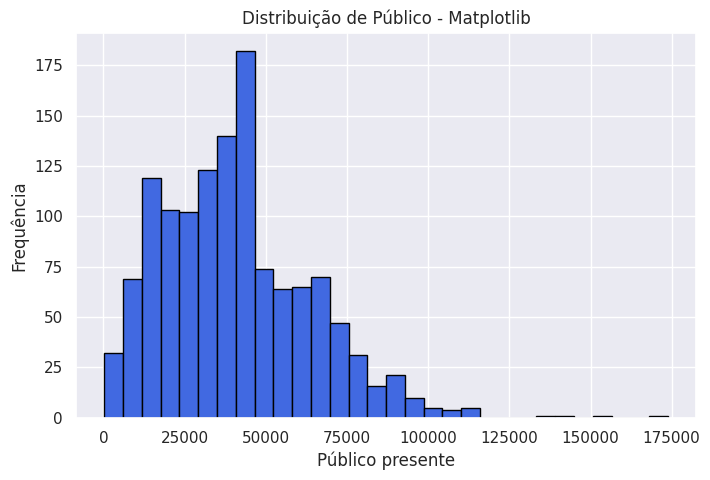

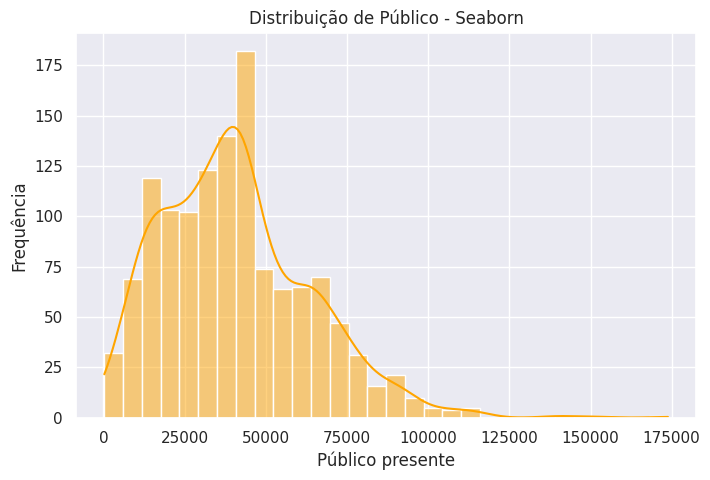

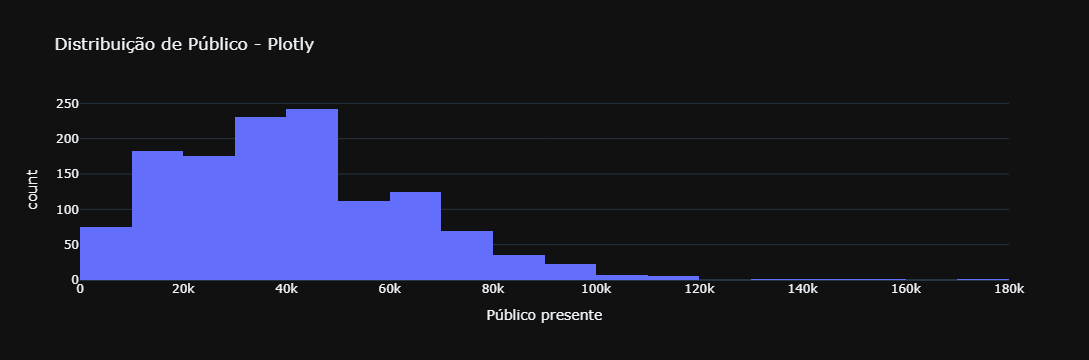

In [2]:
# Q2 - Histograma de público presente nos jogos

# Remover entradas com público 0
wc_filtrado = wc[wc['comparecimento'] > 0]

# ---------- Matplotlib ----------
plt.figure(figsize=(8,5))
plt.hist(wc_filtrado['comparecimento'], bins=30, color='royalblue', edgecolor='black')
plt.title('Distribuição de Público - Matplotlib')
plt.xlabel('Público presente')
plt.ylabel('Frequência')
plt.show()

# ---------- Seaborn ----------
plt.figure(figsize=(8,5))
sns.histplot(wc_filtrado['comparecimento'], bins=30, kde=True, color='orange')
plt.title('Distribuição de Público - Seaborn')
plt.xlabel('Público presente')
plt.ylabel('Frequência')
plt.show()

# ---------- Plotly ----------
fig = px.histogram(
    wc_filtrado, x='comparecimento', nbins=30,
    title='Distribuição de Público - Plotly',
    labels={'comparecimento': 'Público presente'}
)
fig.show()

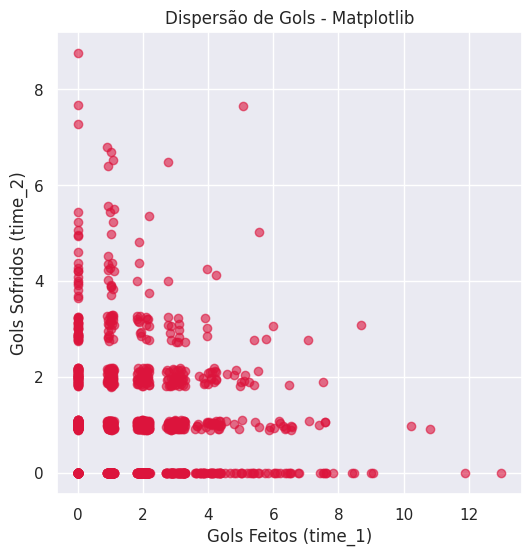

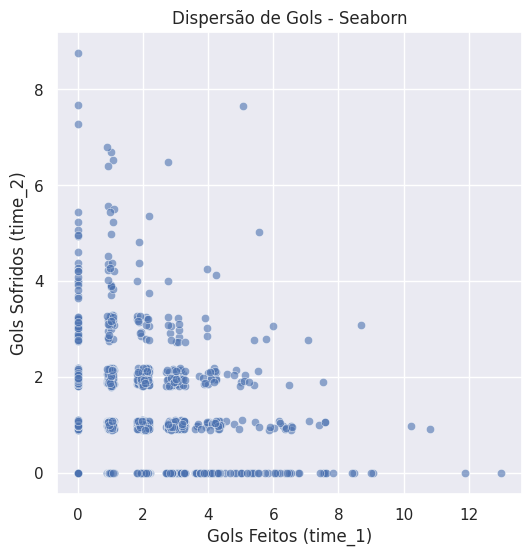

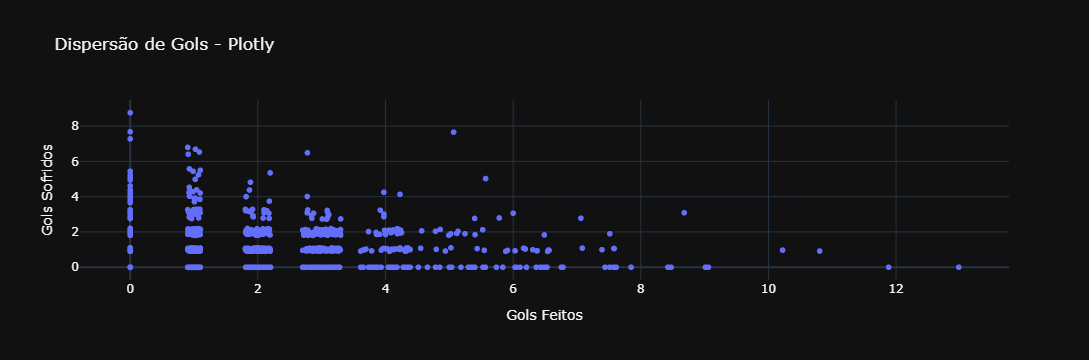

In [3]:
# Q3 - Dispersão entre gols feitos e sofridos

# Leve distorção para espalhar os pontos
gols = wc[['gols_1','gols_2']] * np.random.uniform(0.9, 1.1, (len(wc), 2))

# ---------- Matplotlib ----------
plt.figure(figsize=(6,6))
plt.scatter(gols['gols_1'], gols['gols_2'], alpha=0.6, color='crimson')
plt.title('Dispersão de Gols - Matplotlib')
plt.xlabel('Gols Feitos (time_1)')
plt.ylabel('Gols Sofridos (time_2)')
plt.show()

# ---------- Seaborn ----------
plt.figure(figsize=(6,6))
sns.scatterplot(data=gols, x='gols_1', y='gols_2', alpha=0.6)
plt.title('Dispersão de Gols - Seaborn')
plt.xlabel('Gols Feitos (time_1)')
plt.ylabel('Gols Sofridos (time_2)')
plt.show()

# ---------- Plotly ----------
fig = px.scatter(
    gols, x='gols_1', y='gols_2',
    title='Dispersão de Gols - Plotly',
    labels={'gols_1':'Gols Feitos', 'gols_2':'Gols Sofridos'}
)
fig.show()

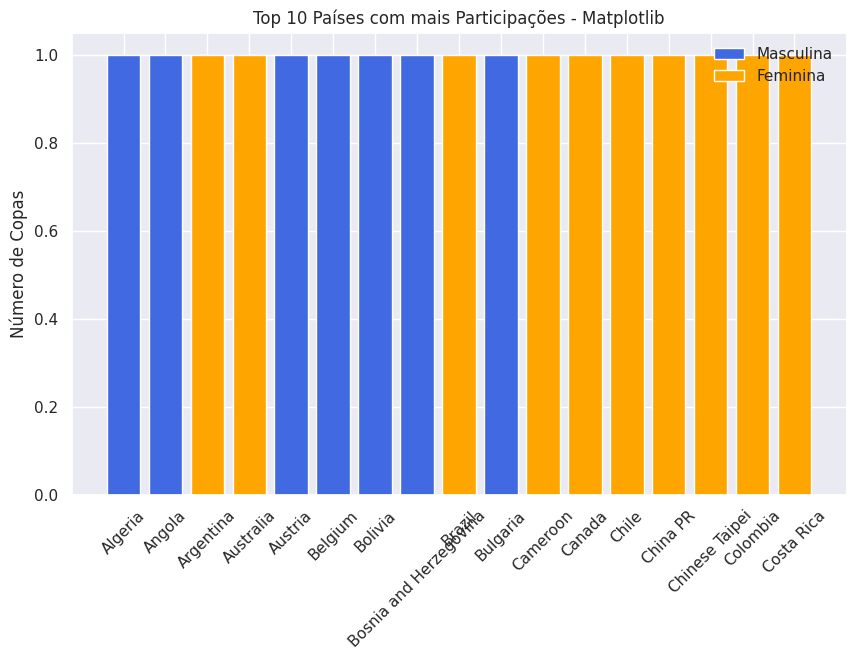

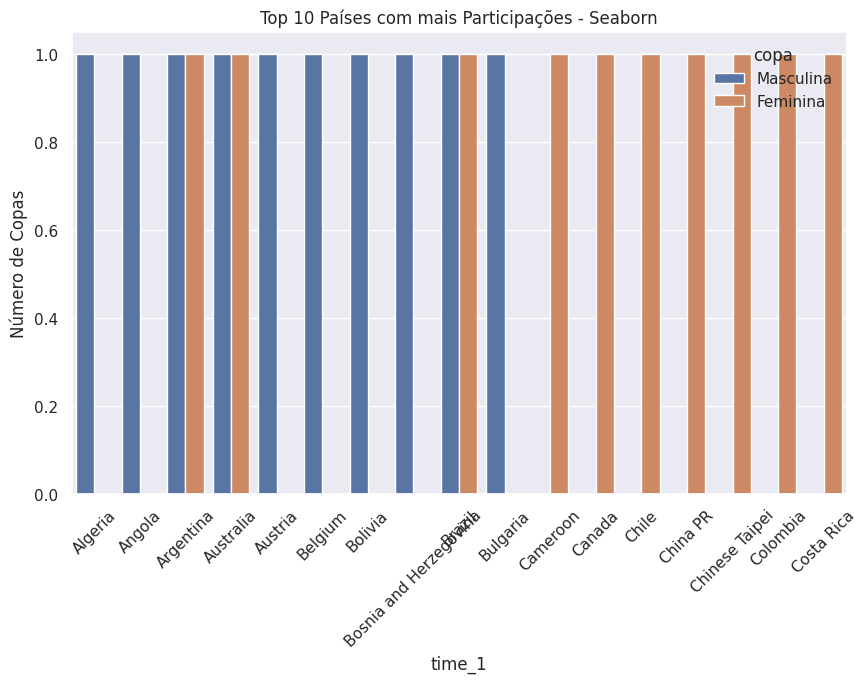

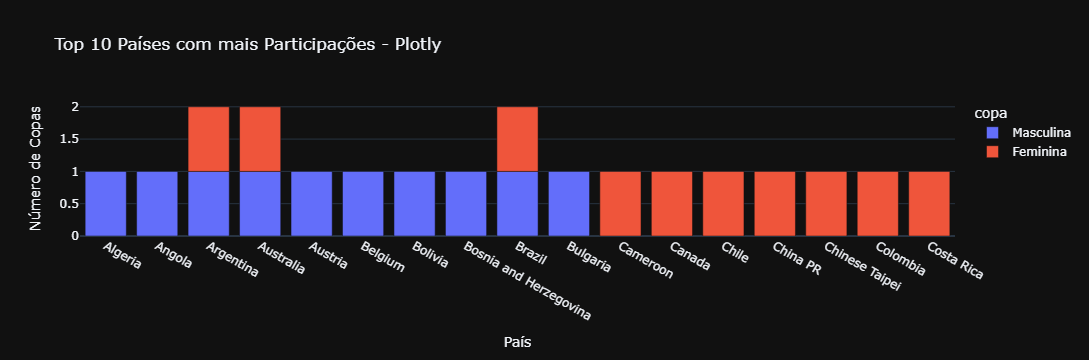

In [4]:
# Q4 - Top 10 países com mais participações

# Contar participações em cada copa (time_1 e time_2)
participacoes = pd.concat([wc[['time_1','copa']], wc[['time_2','copa']].rename(columns={'time_2':'time_1'})])
participacoes = participacoes.groupby(['time_1','copa']).size().reset_index(name='num_jogos')

# Contar número de copas distintas por país e tipo
participacoes['ano'] = wc['ano']
top = participacoes.groupby(['time_1','copa']).size().reset_index(name='num_copas')
top = top.groupby(['time_1','copa']).agg({'num_copas':'sum'}).reset_index()

# Separar masculino e feminino
masc = top[top['copa']=='Masculina'].nlargest(10, 'num_copas')
fem  = top[top['copa']=='Feminina'].nlargest(10, 'num_copas')

# ---------- Matplotlib ----------
plt.figure(figsize=(10,6))
plt.bar(masc['time_1'], masc['num_copas'], label='Masculina', color='royalblue')
plt.bar(fem['time_1'], fem['num_copas'], label='Feminina', bottom=0, color='orange')
plt.title('Top 10 Países com mais Participações - Matplotlib')
plt.xticks(rotation=45)
plt.ylabel('Número de Copas')
plt.legend()
plt.show()

# ---------- Seaborn ----------
plt.figure(figsize=(10,6))
sns.barplot(data=pd.concat([masc,fem]), x='time_1', y='num_copas', hue='copa')
plt.title('Top 10 Países com mais Participações - Seaborn')
plt.xticks(rotation=45)
plt.ylabel('Número de Copas')
plt.show()

# ---------- Plotly ----------
fig = px.bar(pd.concat([masc,fem]), x='time_1', y='num_copas', color='copa',
             title='Top 10 Países com mais Participações - Plotly',
             labels={'time_1':'País','num_copas':'Número de Copas'})
fig.show()

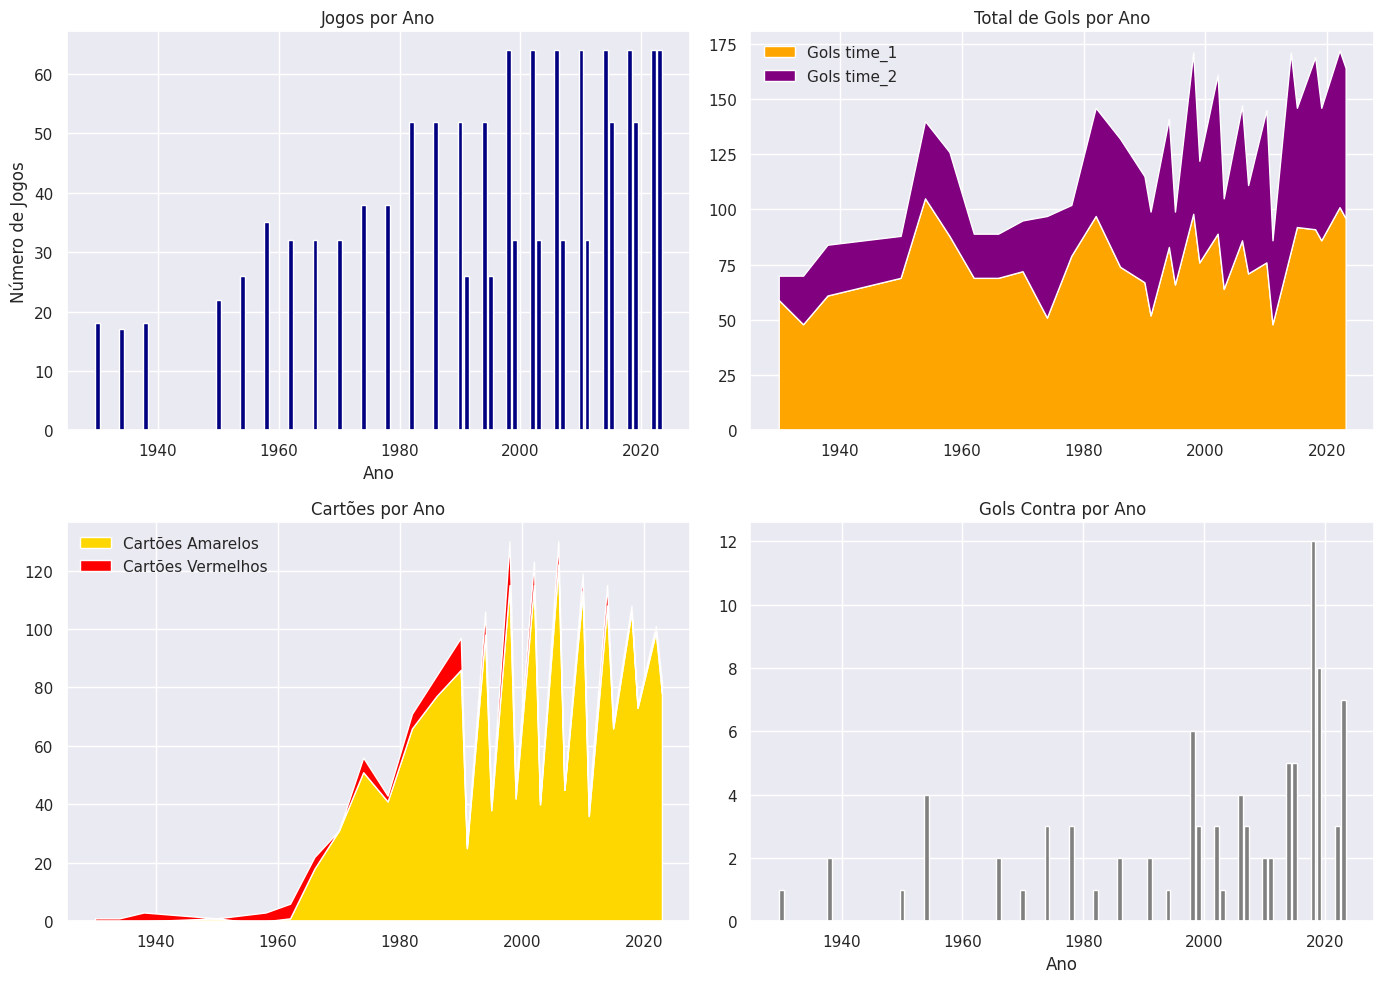

In [5]:
# Q5 - Compilado de estatísticas históricas

# Quantidade de jogos por ano
jogos_por_ano = wc.groupby('ano').size()

# Total de gols por ano
gols_por_ano = wc.groupby('ano')[['gols_1','gols_2']].sum()

# Total de cartões por ano
def conta_cartoes(col):
    return wc[col].notna().astype(int)
wc['cartao_amarelo_total'] = conta_cartoes('cartao_amarelo_1') + conta_cartoes('cartao_amarelo_2')
wc['cartao_vermelho_total'] = conta_cartoes('cartao_vermelho_1') + conta_cartoes('cartao_vermelho_2')
cartoes_por_ano = wc.groupby('ano')[['cartao_amarelo_total','cartao_vermelho_total']].sum()

# Total de gols contra por ano
wc['gols_contra_total'] = wc['gols_1_contra'].notna().astype(int) + wc['gols_2_contra'].notna().astype(int)
gols_contra_por_ano = wc.groupby('ano')['gols_contra_total'].sum()

# ---------- Matplotlib ----------
fig, axs = plt.subplots(2, 2, figsize=(14,10))

# Subplot 1 - Jogos por ano
axs[0,0].bar(jogos_por_ano.index, jogos_por_ano.values, color='navy')
axs[0,0].set_title('Jogos por Ano')
axs[0,0].set_xlabel('Ano')
axs[0,0].set_ylabel('Número de Jogos')

# Subplot 2 - Gols por ano (área)
axs[0,1].stackplot(gols_por_ano.index, gols_por_ano['gols_1'], gols_por_ano['gols_2'],
                   labels=['Gols time_1', 'Gols time_2'], colors=['orange','purple'])
axs[0,1].set_title('Total de Gols por Ano')
axs[0,1].legend()

# Subplot 3 - Cartões por ano (área)
axs[1,0].stackplot(cartoes_por_ano.index, cartoes_por_ano['cartao_amarelo_total'], cartoes_por_ano['cartao_vermelho_total'],
                   labels=['Cartões Amarelos', 'Cartões Vermelhos'], colors=['gold','red'])
axs[1,0].set_title('Cartões por Ano')
axs[1,0].legend()

# Subplot 4 - Gols contra por ano (barras)
axs[1,1].bar(gols_contra_por_ano.index, gols_contra_por_ano.values, color='gray')
axs[1,1].set_title('Gols Contra por Ano')
axs[1,1].set_xlabel('Ano')

plt.tight_layout()
plt.show()